In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from keras.datasets import mnist

In [9]:
def generate_binary_dataset(min_value, max_value, size, positive_condition):
    data = pd.DataFrame(
        np.concatenate((
            np.random.uniform(min_value, max_value, (size, 2)),
            -np.ones((size, 1))), axis=1), 
        columns=['x', 'y', 'target'])
    data.target[positive_condition(data.x, data.y)] = 1
    return data

In [10]:
def plot_separator(svc):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svc.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=100, linewidth=1, label="support vectors", facecolors='none', edgecolors='k')

In [11]:
def plot_binary(data, svc=None):
    plt.figure(figsize=(10, 10))
    plt.scatter(data.x, data.y, c=data.target, label="data", s=30, cmap=plt.cm.Paired)
    
    if svc:
        plot_separator(svc)
    
    plt.grid()
    plt.legend()

In [12]:
dataset = generate_binary_dataset(-4, 4, 500, lambda x, y: x - y > 1)
dataset.head()

,x,y,target
0,-1.299933,-2.493431,1.0
1,-0.363915,1.068871,-1.0
2,-0.909500,0.874467,-1.0
3,-0.626918,-2.468596,1.0
4,-2.588393,1.105290,-1.0


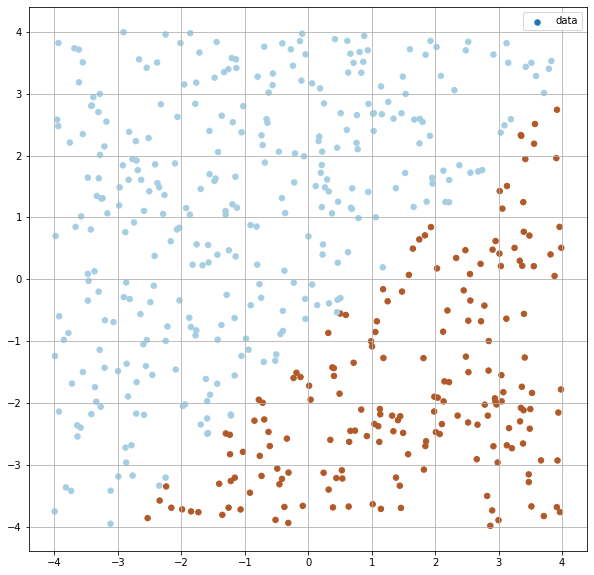

In [13]:
plot_binary(dataset)

In [14]:
model = SVC(kernel="linear")

In [15]:
model.fit(dataset[['x', 'y']], dataset.target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

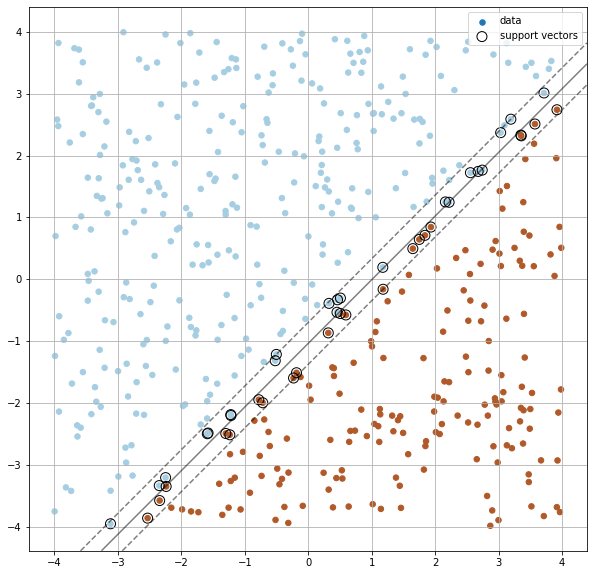

In [16]:
plot_binary(dataset, model)

In [17]:
dataset = generate_binary_dataset(-2, 2, 500, lambda x, y: x ** 2 + y ** 2 < 1)
dataset.head()

,x,y,target
0,0.711366,1.666675,-1.0
1,1.532369,1.131873,-1.0
2,1.630274,-1.204763,-1.0
3,-0.688929,-1.788812,-1.0
4,-0.878254,0.633885,-1.0


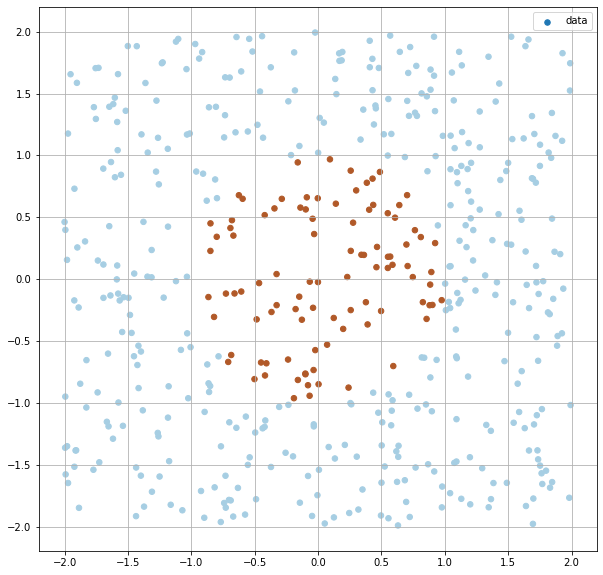

In [18]:
plot_binary(dataset)

In [19]:
model = SVC(kernel='rbf')

In [20]:
model.fit(dataset[['x', 'y']], dataset.target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

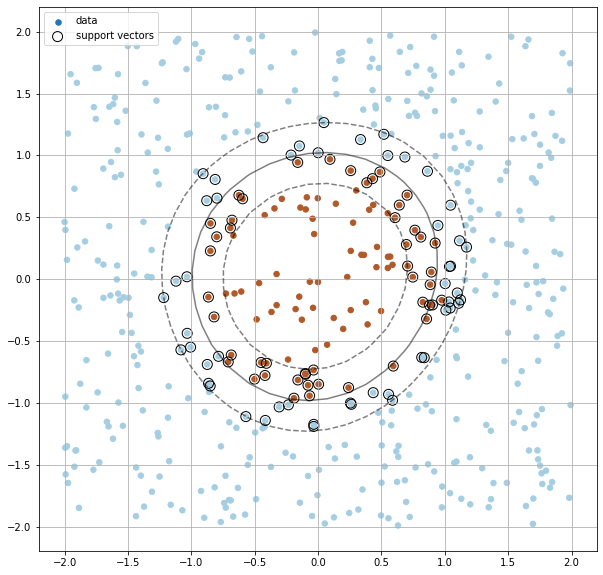

In [21]:
plot_binary(dataset, model)

In [22]:
dataset = generate_binary_dataset(-3, 3, 500, lambda x, y: x ** 2 - y ** 2 < 1)
dataset.head()

,x,y,target
0,1.577997,0.807606,-1.0
1,0.628478,-2.774973,1.0
2,2.633987,2.468088,1.0
3,-0.392841,1.080359,1.0
4,0.573358,0.538079,1.0


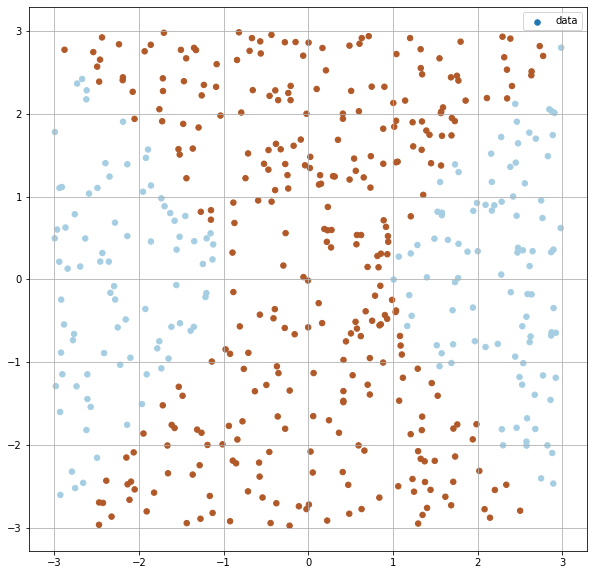

In [23]:
plot_binary(dataset)

In [51]:
model = SVC(kernel='rbf', C=10)

In [52]:
model.fit(dataset[['x', 'y']], dataset.target)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

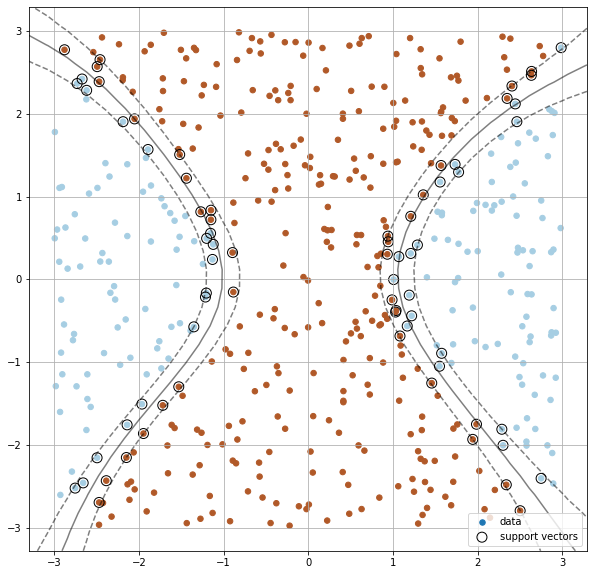

In [53]:
plot_binary(dataset, model)

In [85]:
dataset = generate_binary_dataset(-5, 5, 1000, lambda x, y: ((x - 2.5) ** 2 + (y - 2.5) ** 2 < 3) | ((x + 2.5) ** 2 + (y + 2.5) ** 2 < 3))
dataset.head()

,x,y,target
0,0.908553,3.216517,-1.0
1,4.180894,4.171914,-1.0
2,0.371760,-1.889337,-1.0
3,0.159196,-1.228881,-1.0
4,-2.459665,4.763577,-1.0


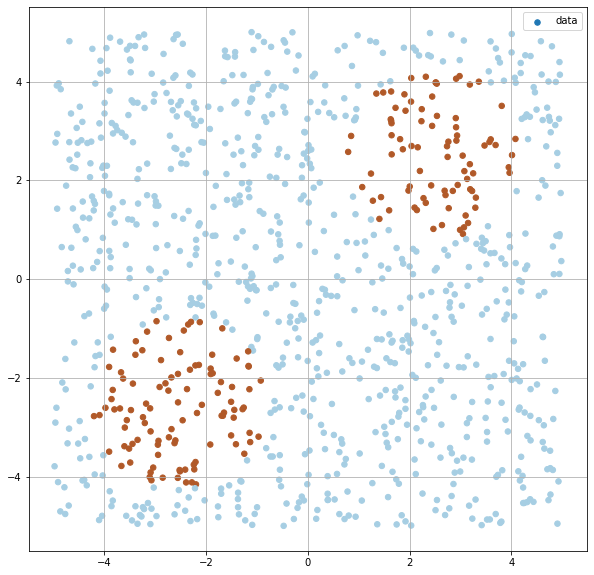

In [86]:
plot_binary(dataset)

In [87]:
model = SVC(kernel='rbf', tol=1e-11, C=5)

In [88]:
model.fit(dataset[['x', 'y']], dataset.target)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=1e-11, verbose=False)

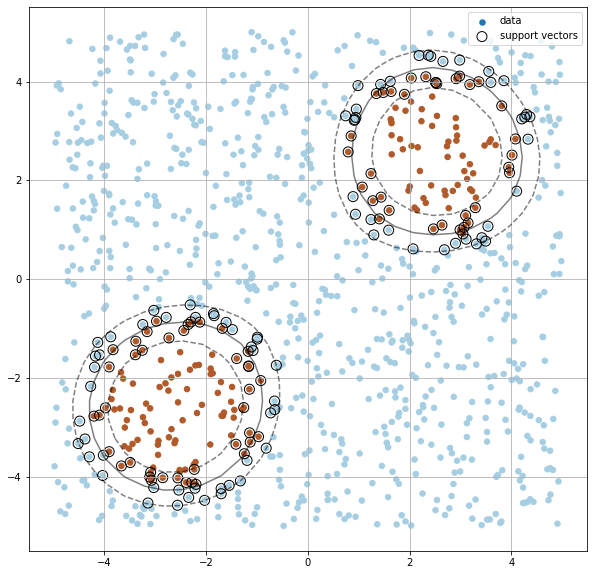

In [89]:
plot_binary(dataset, model)

In [90]:
dataset = generate_binary_dataset(-5, 5, 2000, lambda x, y: ((x - 2.5) ** 2 + (y - 2.5) ** 2 < 2.5) | ((x + 2.5) ** 2 + (y + 2.5) ** 2 < 2.5) | ((x - 2.5) ** 2 + (y + 2.5) ** 2 < 2.5) | ((x + 2.5) ** 2 + (y - 2.5) ** 2 < 2.5))
dataset.head()

,x,y,target
0,1.119456,1.133917,-1.0
1,3.950241,-4.300848,-1.0
2,3.089532,0.631417,-1.0
3,3.959307,-4.532253,-1.0
4,-1.784286,-0.926546,-1.0


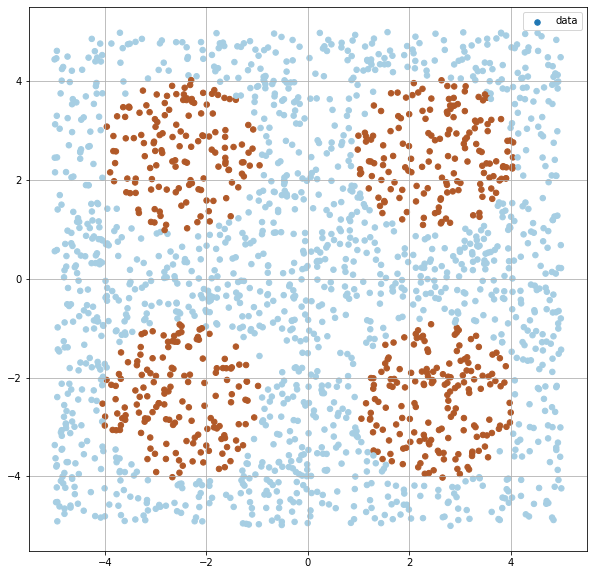

In [91]:
plot_binary(dataset)

In [92]:
model = SVC(kernel='rbf', tol=1e-12, C=10)

In [93]:
model.fit(dataset[['x', 'y']], dataset.target)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=1e-12, verbose=False)

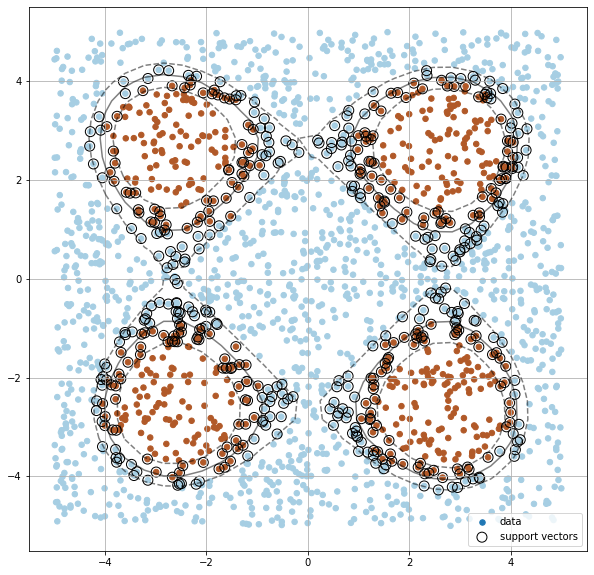

In [94]:
plot_binary(dataset, model)

In [95]:
dataset = generate_binary_dataset(-5, 5, 2000, lambda x, y: np.abs(x - y) > 2)
dataset.head()

,x,y,target
0,3.998807,4.978932,-1.0
1,-3.152069,4.175288,1.0
2,-1.800312,-4.722647,1.0
3,-0.701373,-0.962418,-1.0
4,-4.305558,-3.573745,-1.0


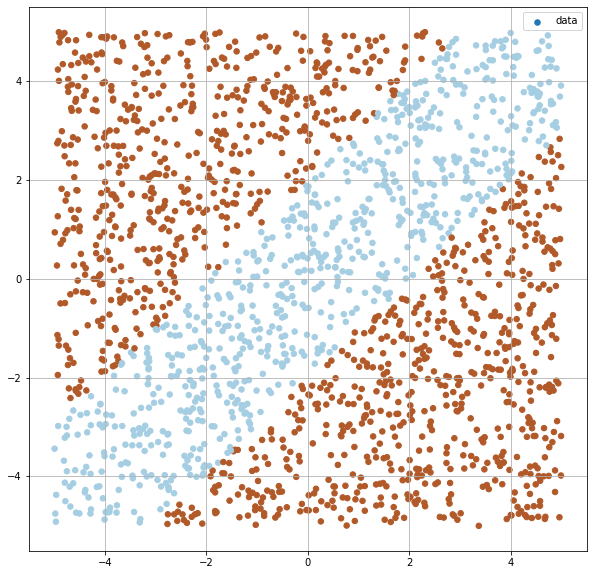

In [96]:
plot_binary(dataset)

In [97]:
model = SVC(kernel='poly', degree=2, tol=1e-3)

In [98]:
model.fit(dataset[['x', 'y']], dataset.target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

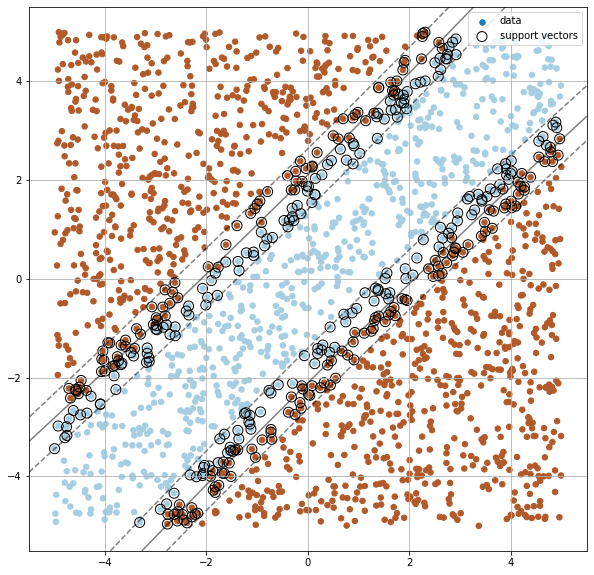

In [99]:
plot_binary(dataset, model)

In [105]:
dataset = generate_binary_dataset(-5, 5, 2000, lambda x, y: x * y > 0)
dataset.head()

,x,y,target
0,-2.201245,-0.462957,1.0
1,1.145537,0.240512,1.0
2,2.700958,-3.254947,-1.0
3,0.778981,-4.708636,-1.0
4,-1.529360,-2.120830,1.0


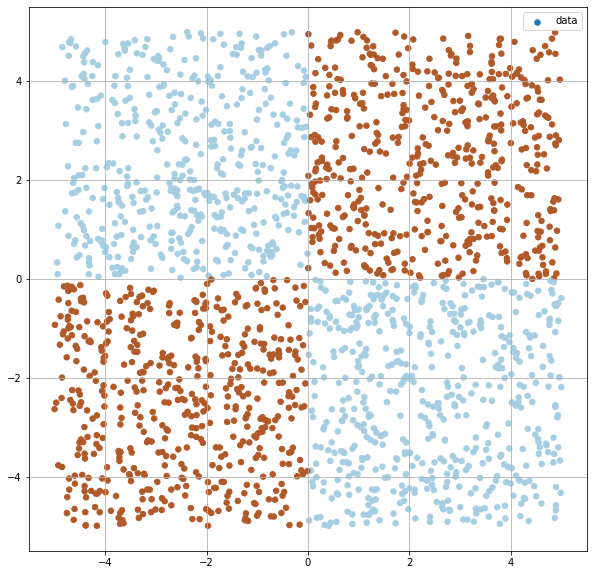

In [106]:
plot_binary(dataset)

In [125]:
model = SVC(kernel='poly', degree=2, tol=1e-7)

In [126]:
model.fit(dataset[['x', 'y']], dataset.target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=1e-07, verbose=False)

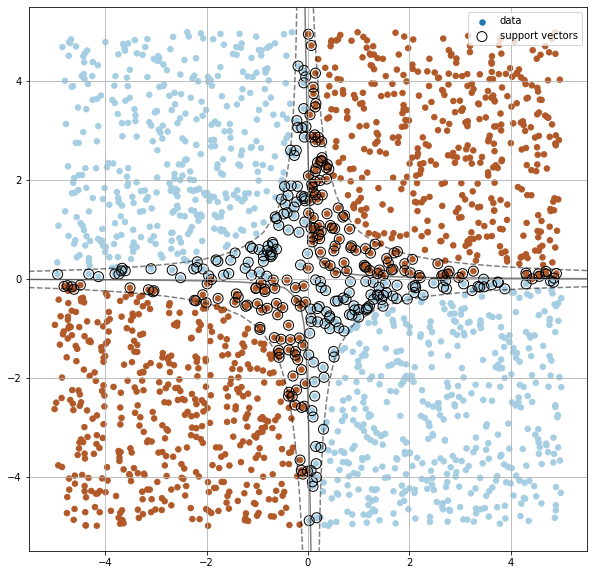

In [127]:
plot_binary(dataset, model)

In [128]:
dataset = generate_binary_dataset(-5, 5, 2000, lambda x, y: x * y * (np.abs(x) - np.abs(y)) > 0)
dataset.head()

,x,y,target
0,-4.650993,-2.869596,1.0
1,-2.170059,3.642588,1.0
2,-2.201380,3.319934,1.0
3,1.699066,-0.215868,-1.0
4,-3.082438,3.859474,1.0


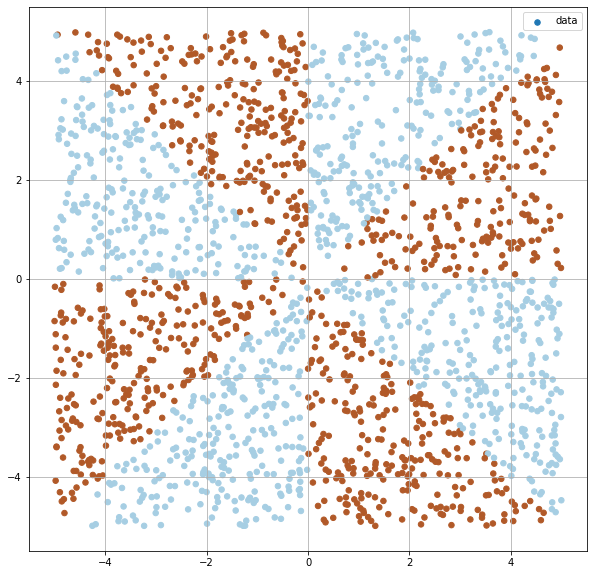

In [129]:
plot_binary(dataset)

In [130]:
model = SVC(kernel='poly', degree=4, tol=1e-12)

In [131]:
model.fit(dataset[['x', 'y']], dataset.target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=4, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=1e-12, verbose=False)

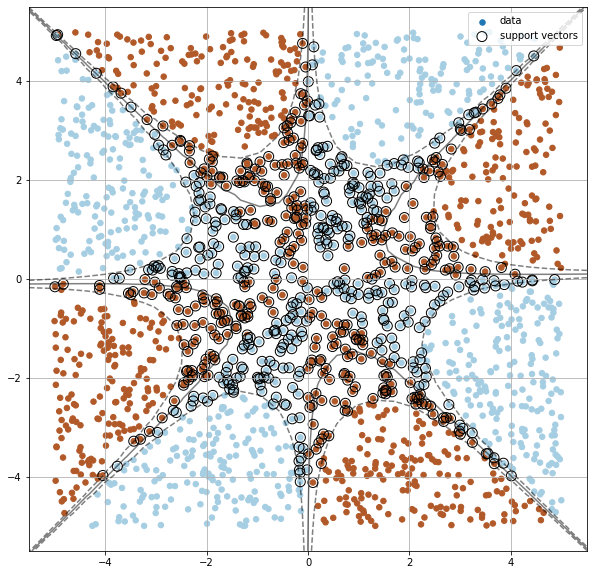

In [132]:
plot_binary(dataset, model)

In [133]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [134]:
X_train.shape

(60000, 28, 28)

In [135]:
X_test.shape

(10000, 28, 28)

In [136]:
X_train = X_train.reshape(60000, 28 * 28).astype('float32') / 255
X_test = X_test.reshape(10000, 28 * 28).astype('float32') / 255

#### Grid Search: Hyperparameter Tuning

Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

In [137]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

hyper_params = [{'gamma': [1e-2, 1e-3, 1e-4], 'C': [5, 10]}]

# specify model
model = SVC(kernel="rbf")

model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)  

In [ ]:
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
